In [49]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [50]:
os.chdir("..")
%pwd

'/home/jupyter'

In [51]:
from utils.gcp_helpers import get_dataframe_from_bucket

In [52]:
data = get_dataframe_from_bucket("Radiation/mouse/combined/mouse.combined.expression.071121.tsv","ah21_data", "ah21_data", sep="\t")
metadata = get_dataframe_from_bucket("Radiation/mouse/combined/mouse.metadata.combined.071121.csv","ah21_data", "ah21_data", sep=",")

In [64]:
merged_data.groupby("irradiated").aggregate(["mean", "count", "median", "std"])

dose_Gy                        timepoint_hr               \
               mean count median       std         mean count median   
irradiated                                                             
No          0.00000    65    0.0  0.000000    70.061538    65     48   
Yes         4.62249   249    3.0  3.176282    72.168675   249     48   

                       
                  std  
irradiated             
No          54.869128  
Yes         53.038213

In [46]:
merged_data = pd.merge(metadata, data.T, left_on="sample", right_index=True)
merged_data.sort_values("irradiated", inplace=True)

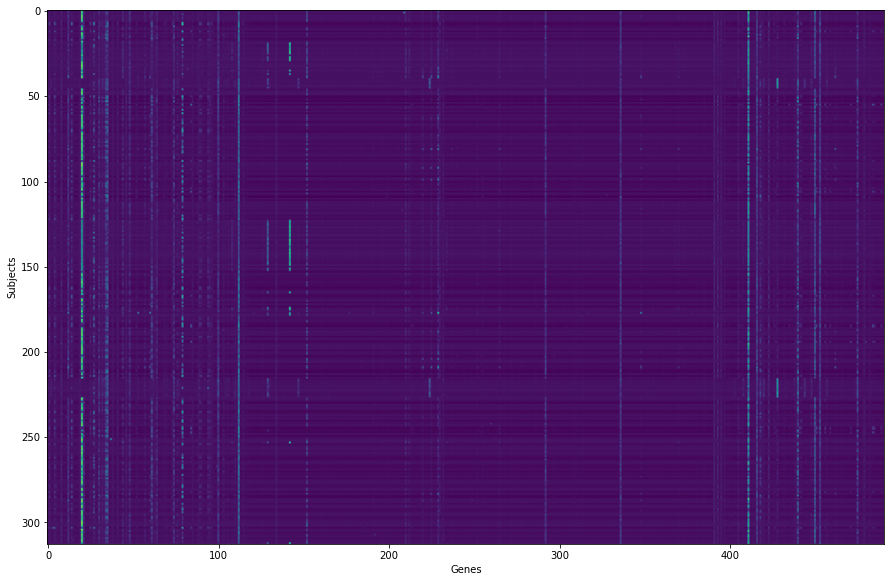

In [42]:
fig, ax = plt.subplots(1, figsize=(15,15))
#ax.imshow(data.T.iloc[1:, 8:500].astype(float))
ax.imshow(merged_data.iloc[1:, 9:500].astype(float))
ax.set_xlabel("Genes")
ax.set_ylabel("Subjects")

plt.show()

In [36]:
irr = [1 if x == "Yes" else 0 for x in merged_data.irradiated.values]

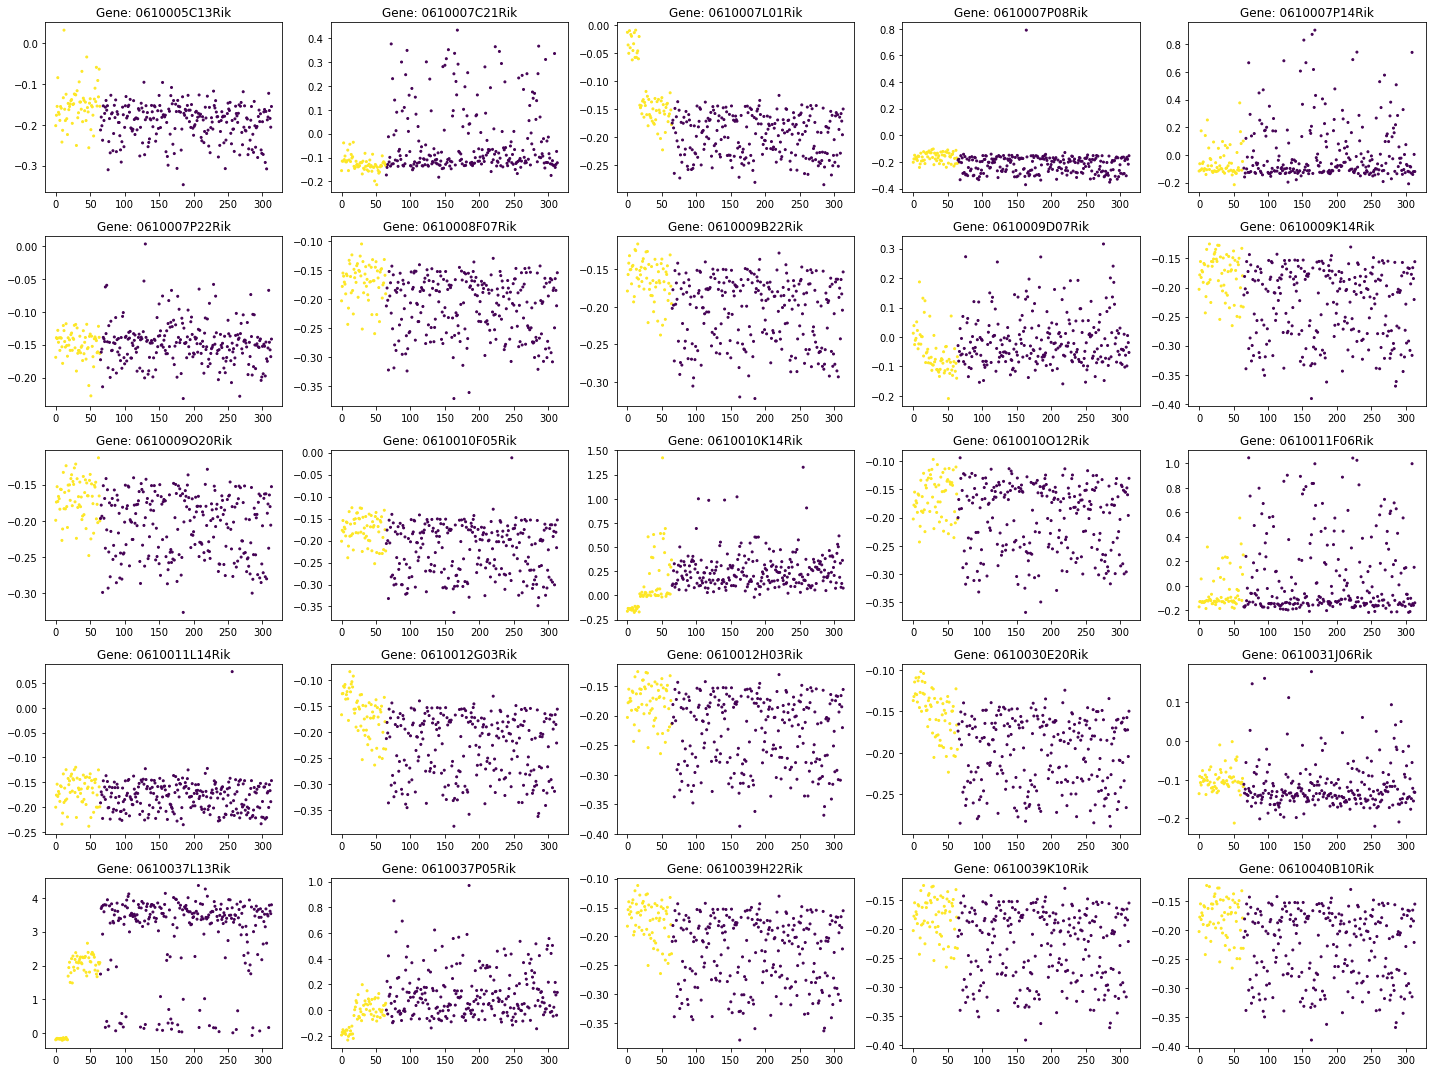

In [34]:
fig, axs = plt.subplots(5,5, figsize=(20,15))
idx = 0
for i in range(5):
    for j in range(5):
        axs[i,j].scatter(range(314), data.iloc[idx,1:].values, s=4, c=irr)
        #axs[i,j].plot(range(314), data.iloc[idx, 1:].values[irr==1.].mean())
        axs[i,j].set_title("Gene: " + data.iloc[idx,0])
        idx += 1
plt.tight_layout()

In [188]:
data.iloc[idx, 1:].values[irr==1.]

array([], shape=(0, 314), dtype=object)

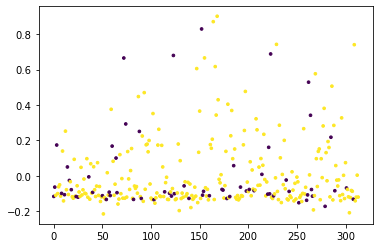

In [173]:
plt.scatter(range(314), data.iloc[4, 1:], c=irr, s=7)
plt.show()

In [25]:
metadata.nunique()

sample          314
organism          1
gender            1
strain            2
dose_Gy           9
radiation         4
timepoint_hr      6
dataset           3
irradiated        2
dtype: int64

In [61]:
metadata

,sample,organism,gender,strain,dose_Gy,radiation,timepoint_hr,dataset,irradiated
0,GSM821301,Mus musculus,male,C57BL/6N,0.0,Control,6,GLDS156,No
1,GSM821298,Mus musculus,male,C57BL/6N,0.0,Control,6,GLDS156,No
2,GSM821295,Mus musculus,male,C57BL/6N,0.0,Control,6,GLDS156,No
3,GSM821296,Mus musculus,male,C57BL/6N,0.0,Control,6,GLDS156,No
4,GSM821300,Mus musculus,male,C57BL/6N,0.0,Control,6,GLDS156,No
...,...,...,...,...,...,...,...,...,...
309,GSM1530198,Mus musculus,male,C57BL/6,4.0,High-dose-rate_Xray,24,GSE62623,Yes
310,GSM1530199,Mus musculus,male,C57BL/6,4.0,High-dose-rate_Xray,24,GSE62623,Yes
311,GSM1530200,Mus musculus,male,C57BL/6,4.0,High-dose-rate_Xray,24,GSE62623,Yes
312,GSM1530201,Mus musculus,male,C57BL/6,4.0,High-dose-rate_Xray,24,GSE62623,Yes


In [32]:
metadata.groupby("dose_Gy").aggregate(["mean", "count"])

timepoint_hr      
                mean count
dose_Gy                   
0.0        70.061538    65
1.0        24.000000    16
1.5        86.400000    50
2.0        18.705882    17
3.0        86.400000    50
4.0        24.000000    12
6.0        86.400000    50
8.0         6.000000     6
10.0       83.000000    48